# Analyse d'une base de données des emplyés

## Présentation de la base de données

__L'ensemble de données comprend 4 variables sur 74 employés. Les valeurs sont qualitatives et sont les suivantes:__

- Work_accident: 0 pas d'accident pendant le séjour du salarié, 1 - accident lors du séjour du salarié 
- left: 0 indique que l'employé reste dans l'entreprise, 1 indique - l'employé a quitté l'entreprise 
- sales: indique le département de l'employé (IT, support, marketing, product_mng, sales, hr, management, technical, accounting, RandD)
- salary: indique la catégorie du salaire (low, medium, high)

In [1]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

## Enoncé

__1. Extraire les statistiques sur le jeux de données__

__2. Analyse ACM:__
   - Effectuer une ACM sur le jeu de données. Justifier le nombre de composantes retournées par l'ACM.
   - Afficher les valeurs propres et les ratio de variance expliquée par chaque composante. 
   - Quelle est le nombre de facteurs à garder? justifier le choix.
   - Effectuer l'ACM avec le nombre de facteurs gardés. 
   - Afficher les coordonnées, les contributions et les qualités de représentation des points lignes sur chaque axe. 
   - Tracer le graphique des points lignes sur les deux premières composantes et interpréter le résultats.
   - Afficher les coordonnées, les contributions et les qualités de représentation des points colonnes sur chaque axe.
   - Tracer le graphique des points colonnes sur les deux premières composantes et interprétez le résultats.
   - Est-il intéressant de tracer les graphiques (points lignes et points colonnes) sur les autres dimensions ? Effectuer la démarche le cas échéant, et analyser.

In [2]:
data = pd.read_excel('MT15_exam_acm.xls')
data.index = [f'Salarié {i+1}' for i in range(len(data.index))]

In [3]:
data

Work_accident  left        sales  salary
Salarié 1    No accident  stay           IT  medium
Salarié 2       Accident  stay      support     low
Salarié 3    No accident  stay    marketing  medium
Salarié 4       Accident  stay  product_mng     low
Salarié 5    No accident  stay      support     low
...                  ...   ...          ...     ...
Salarié 70   No accident  stay      support     low
Salarié 71   No accident  stay        sales  medium
Salarié 72   No accident  stay      support  medium
Salarié 73   No accident  left        sales     low
Salarié 74   No accident  stay        sales     low

[74 rows x 4 columns]

In [9]:
X = data.values

In [7]:
# Création d'une instance

my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values)

In [10]:
# Estimation
my_mca.fit(X)

MCA(row_labels=array(['Salarié 1', 'Salarié 2', 'Salarié 3', 'Salarié 4', 'Salarié 5',
       'Salarié 6', 'Salarié 7', 'Salarié 8', 'Salarié 9', 'Salarié 10',
       'Salarié 11', 'Salarié 12', 'Salarié 13', 'Salarié 14',
       'Salarié 15', 'Salarié 16', 'Salarié 17', 'Salarié 18',
       'Salarié 19', 'Salarié 20', 'Salarié 21', 'Salarié 22',
       'Salarié 23', 'Salarié 24', 'Salarié 25', 'Salarié 26',
       'Salarié 27', 'Salarié 28', '...
       'Salarié 51', 'Salarié 52', 'Salarié 53', 'Salarié 54',
       'Salarié 55', 'Salarié 56', 'Salarié 57', 'Salarié 58',
       'Salarié 59', 'Salarié 60', 'Salarié 61', 'Salarié 62',
       'Salarié 63', 'Salarié 64', 'Salarié 65', 'Salarié 66',
       'Salarié 67', 'Salarié 68', 'Salarié 69', 'Salarié 70',
       'Salarié 71', 'Salarié 72', 'Salarié 73', 'Salarié 74'],
      dtype=object),
    var_labels=array(['Work_accident', 'left', 'sales', 'salary'], dtype=object))

In [11]:
# Calcul des valeurs propres
print(my_mca.eig_)

[[  0.37787717   0.34730269   0.32269661   0.29730798   0.25
    0.25         0.25         0.25         0.25         0.21544703
    0.17508636   0.15387333   0.11040882]
 [ 11.62698977  10.68623674   9.9291266    9.14793789   7.69230769
    7.69230769   7.69230769   7.69230769   7.69230769   6.62913945
    5.38727259   4.734564     3.39719451]
 [ 11.62698977  22.31322651  32.24235311  41.390291    49.08259869
   56.77490638  64.46721407  72.15952176  79.85182946  86.48096891
   91.8682415   96.60280549 100.        ]]


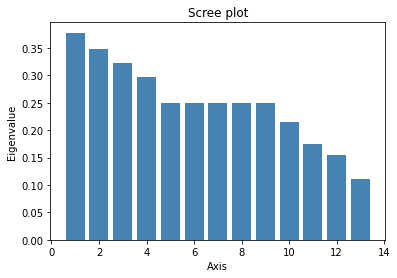

In [12]:
# Graphique 
my_mca.plot_eigenvalues()

In [13]:
# 
print("La moyenne des valeurs propres : \n", np.average(my_mca.eig_[0]))
print("La moyenne des valeurs propres est aussi égale à 1/p : \n", 1/4)

La moyenne des valeurs propres : 
 0.25000000000000006
La moyenne des valeurs propres est aussi égale à 1/p : 
 0.25


In [ ]:
# On sélection les éléments dont la valeurs propre est supérieure à 0.25
# Donc dans notre cas ici, on retient 4 composantes

In [14]:
# On refait une ACM avec les 4 composantes
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values[0:6],n_components=4)
#Calcul
my_mca.fit(X)

MCA(n_components=4,
    row_labels=array(['Salarié 1', 'Salarié 2', 'Salarié 3', 'Salarié 4', 'Salarié 5',
       'Salarié 6', 'Salarié 7', 'Salarié 8', 'Salarié 9', 'Salarié 10',
       'Salarié 11', 'Salarié 12', 'Salarié 13', 'Salarié 14',
       'Salarié 15', 'Salarié 16', 'Salarié 17', 'Salarié 18',
       'Salarié 19', 'Salarié 20', 'Salarié 21', 'Salarié 22',
       'Salarié 23', 'Salarié 24', 'Salarié 25', 'Salarié 26',
       'Salarié 27...
       'Salarié 51', 'Salarié 52', 'Salarié 53', 'Salarié 54',
       'Salarié 55', 'Salarié 56', 'Salarié 57', 'Salarié 58',
       'Salarié 59', 'Salarié 60', 'Salarié 61', 'Salarié 62',
       'Salarié 63', 'Salarié 64', 'Salarié 65', 'Salarié 66',
       'Salarié 67', 'Salarié 68', 'Salarié 69', 'Salarié 70',
       'Salarié 71', 'Salarié 72', 'Salarié 73', 'Salarié 74'],
      dtype=object),
    var_labels=array(['Work_accident', 'left', 'sales', 'salary'], dtype=object))

In [15]:

# Coordonnées des points lignes
print(my_mca.row_coord_)

[[ 0.37404621  0.71027735 -0.23627712 -0.22618361]
 [ 0.00616611 -1.06811784  0.18145969 -0.26365012]
 [ 0.60302794  0.12539916  0.33926352  0.8762298 ]
 [-0.45848768 -1.3385793   0.75417176  0.34817181]
 [-0.22673892 -0.28757212 -0.49888933 -0.06686775]
 [-0.03043263 -0.25634572 -0.5505052  -0.23688186]
 [ 0.2024724  -1.03689144  0.12984382 -0.43366423]
 [ 0.490848    0.13828184 -0.41469719  0.05562289]
 [-0.39798141 -0.56755872 -1.02631206 -1.07894343]
 [ 0.490848    0.13828184 -0.41469719  0.05562289]
 [ 0.72136869  0.53448007  0.68584615 -0.14240411]
 [-0.77214878 -0.07614524  0.02624216 -0.40958134]
 [ 0.490848    0.13828184 -0.41469719  0.05562289]
 [-0.03043263 -0.25634572 -0.5505052  -0.23688186]
 [-0.03043263 -0.25634572 -0.5505052  -0.23688186]
 [ 0.490848    0.13828184 -0.41469719  0.05562289]
 [ 0.2945417   0.10705544 -0.36308132  0.225637  ]
 [-0.82449209  0.51602345 -0.14035506  0.04803699]
 [ 0.95427372 -0.24606565  1.36619518 -0.33918648]
 [-1.3686504  -0.35765992  0.30

In [16]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[5.00343368e-01 1.96298082e+00 2.33785299e-01 2.32532676e-01]
 [1.35968905e-04 4.43913620e+00 1.37890454e-01 3.15949485e-01]
 [1.30044652e+00 6.11856252e-02 4.82001292e-01 3.48977760e+00]
 [7.51749203e-01 6.97185490e+00 2.38184995e+00 5.50996619e-01]
 [1.83852608e-01 3.21776025e-01 1.04227497e+00 2.03233408e-02]
 [3.31204699e-03 2.55689128e-01 1.26910258e+00 2.55049995e-01]
 [1.46605178e-01 4.18337416e+00 7.06019083e-02 8.54808663e-01]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.40627020e-02]
 [5.66426019e-01 1.25337701e+00 4.41095606e+00 5.29125951e+00]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.40627020e-02]
 [1.86093928e+00 1.11153505e+00 1.96982338e+00 9.21736447e-02]
 [2.13215910e+00 2.25603425e-02 2.88385261e-03 7.62503861e-01]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.40627020e-02]
 [3.31204699e-03 2.55689128e-01 1.26910258e+00 2.55049995e-01]
 [3.31204699e-03 2.55689128e-01 1.26910258e+00 2.55049995e-01]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.406270

In [17]:
# Cos2 des points lignes
print(my_mca.row_cos2_)

[[6.33508670e-02 2.28432543e-01 2.52781550e-02 2.31645742e-02]
 [1.14453827e-05 3.43436691e-01 9.91216860e-03 2.09249433e-02]
 [1.30067288e-01 5.62448148e-03 4.11687375e-02 2.74618161e-01]
 [3.35525783e-02 2.85995212e-01 9.07843688e-02 1.93489665e-02]
 [2.91939221e-02 4.69606213e-02 1.41334673e-01 2.53906412e-03]
 [1.04823103e-03 7.43755658e-02 3.43005439e-01 6.35099479e-02]
 [1.67705465e-02 4.39827232e-01 6.89696627e-03 7.69347836e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.23192472e-03]
 [8.52508948e-03 1.73378394e-02 5.66933658e-02 6.26571636e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.23192472e-03]
 [1.86126320e-01 1.02177731e-01 1.68246730e-01 7.25334384e-03]
 [2.49286241e-01 2.42427504e-03 2.87935704e-04 7.01417610e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.23192472e-03]
 [1.04823103e-03 7.43755658e-02 3.43005439e-01 6.35099479e-02]
 [1.04823103e-03 7.43755658e-02 3.43005439e-01 6.35099479e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.231924